#  ANZ VIRTUAL INTERNSHIP PROJECT  


The task is based on a synthesised transaction dataset containing 3 months worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

## TASK 1 : Exploratory Data Analysis
### 1. Data :
The data is provided by the Data ANZ itself when we enroll ourselves in their program.
### 2. Features :
status : denotes the status of the transaction posted or authorized for transaction.

card_present_flag : Did the customer have a card during the transaction (1.1 = Yes or 0.0 = No).

bpay_biller_code : unique code of the BPay Transaction done by the customer.

account : account number of the customers who made transaction.

currency : currency type in which the transaction has been done (AUD dollars).

long_lat : Longitude and Latitude location of the customer.

txn_description : the mode of transaction the customer has done.

merchant_id : the merchant id where the customers have done their transaction.

merChant_code : unique merchant code for each customer.

first_name : first name of the customer.

balance : balance the customer had during the transaction of period 3 months.

date : date when the transaction took place.

gender : gender of the customer(Male or Female).

age : age of the customer.

merchant_suburb : the district or city where the merchant is located.

merchant_state : the state where the merchant is located.

extraction : extraction of the transaction data.

amount : the amount transacted by the customer.

transaction_id : unique transaction id given by the merchant when the customer makes an transaction.

country : country where the customer's are located (Australia).

customer_id = id for the customer's to differentiate them as unique.

merchant_long_lat : the latitude and longitude location of the merchant.

movement : mode of transaction (credit or debit).

### The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights we can gather from the tasks below will be genuine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
from pandas_profiling import ProfileReport

sns.set_context("paper", rc={"font.size": 20, "axes.titlesize": 20, "axes.labelsize": 10})

##  Loading Data

In [2]:
data = pd.read_excel('E:\Forage Internship\ANZ\ANZ synthesised transaction dataset.xlsx')
data.head(30)

status  card_present_flag bpay_biller_code         account currency  \
0   authorized                1.0              NaN  ACC-1598451071      AUD   
1   authorized                0.0              NaN  ACC-1598451071      AUD   
2   authorized                1.0              NaN  ACC-1222300524      AUD   
3   authorized                1.0              NaN  ACC-1037050564      AUD   
4   authorized                1.0              NaN  ACC-1598451071      AUD   
5       posted                NaN              NaN  ACC-1608363396      AUD   
6   authorized                1.0              NaN  ACC-2776252858      AUD   
7   authorized                1.0              NaN  ACC-2776252858      AUD   
8   authorized                1.0              NaN   ACC-182446574      AUD   
9       posted                NaN              NaN   ACC-602667573      AUD   
10      posted                NaN              NaN  ACC-2171593283      AUD   
11      posted                NaN              NaN  ACC-2776252858      AUD   
12  authorized                1.0              NaN   ACC-182446574      AUD   
13      posted                NaN              NaN   ACC-588564840      AUD   
14      posted                NaN              NaN  ACC-1496451953      AUD   
15  authorized                1.0              NaN  ACC-1903037542      AUD   
16      posted                NaN              NaN  ACC-2014856841      AUD   
17      posted                NaN              NaN  ACC-4163822186      AUD   
18      posted                NaN              NaN  ACC-3954677887      AUD   
19  authorized                1.0              NaN  ACC-4258502723      AUD   
20  authorized                1.0              NaN  ACC-1598451071      AUD   
21  authorized                0.0              NaN  ACC-2890243754      AUD   
22  authorized                1.0              NaN  ACC-3481401842      AUD   
23  authorized                0.0              NaN  ACC-2615038700      AUD   
24  authorized                1.0              NaN   ACC-966140392      AUD   
25      posted                NaN              NaN   ACC-354106658      AUD   
26      posted                NaN              NaN  ACC-1443681913      AUD   
27  authorized                1.0              NaN  ACC-1710017148      AUD   
28  authorized                1.0              NaN  ACC-2673069055      AUD   
29  authorized                0.0              NaN  ACC-1710017148      AUD   

         long_lat txn_description                           merchant_id  \
0   153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1   153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2   151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3   153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4   153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   
5   151.22 -33.87         PAYMENT                                   NaN   
6   144.95 -37.76       SALES-POS  3aa18033-a0a9-4190-a117-b7caaf4d07e3   
7   144.95 -37.76             POS  ee58145d-26e8-4b01-9cd9-62378014f21d   
8   116.06 -32.00             POS  cfbf535e-caa8-499f-9d41-bbdc2b836d85   
9   151.23 -33.96      INTER BANK                                   NaN   
10  146.94 -36.04         PAYMENT                                   NaN   
11  144.95 -37.76         PAYMENT                                   NaN   
12  116.06 -32.00       SALES-POS  33952b07-859c-4c0a-8b1d-813a5f6b444c   
13  151.27 -33.76      INTER BANK                                   NaN   
14  145.16 -37.84      INTER BANK                                   NaN   
15  153.05 -27.61             POS  d920de7f-959c-4d9a-aee5-930689a2f8cd   
16  144.99 -37.90      INTER BANK                                   NaN   
17  149.03 -34.97         PAYMENT                                   NaN   
18  115.72 -32.28         PAYMENT                                   NaN   
19  145.45 -37.74             POS  b5565fff-0333-4c74-a61a

In [3]:
# Summarizing dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [4]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##  Dropping columns with redundant or missing data


In [5]:
data.drop(['bpay_biller_code', 'merchant_code', 'merchant_id', 'currency', 'country'], axis=1, inplace=True)
data["date"] = pd.to_datetime(data["date"])
data.head(30)

status  card_present_flag         account       long_lat  \
0   authorized                1.0  ACC-1598451071  153.41 -27.95   
1   authorized                0.0  ACC-1598451071  153.41 -27.95   
2   authorized                1.0  ACC-1222300524  151.23 -33.94   
3   authorized                1.0  ACC-1037050564  153.10 -27.66   
4   authorized                1.0  ACC-1598451071  153.41 -27.95   
5       posted                NaN  ACC-1608363396  151.22 -33.87   
6   authorized                1.0  ACC-2776252858  144.95 -37.76   
7   authorized                1.0  ACC-2776252858  144.95 -37.76   
8   authorized                1.0   ACC-182446574  116.06 -32.00   
9       posted                NaN   ACC-602667573  151.23 -33.96   
10      posted                NaN  ACC-2171593283  146.94 -36.04   
11      posted                NaN  ACC-2776252858  144.95 -37.76   
12  authorized                1.0   ACC-182446574  116.06 -32.00   
13      posted                NaN   ACC-588564840  151.27 -33.76   
14      posted                NaN  ACC-1496451953  145.16 -37.84   
15  authorized                1.0  ACC-1903037542  153.05 -27.61   
16      posted                NaN  ACC-2014856841  144.99 -37.90   
17      posted                NaN  ACC-4163822186  149.03 -34.97   
18      posted                NaN  ACC-3954677887  115.72 -32.28   
19  authorized                1.0  ACC-4258502723  145.45 -37.74   
20  authorized                1.0  ACC-1598451071  153.41 -27.95   
21  authorized                0.0  ACC-2890243754  153.32 -27.93   
22  authorized                1.0  ACC-3481401842  115.74 -31.72   
23  authorized                0.0  ACC-2615038700  145.35 -38.03   
24  authorized                1.0   ACC-966140392  147.08 -37.97   
25      posted                NaN   ACC-354106658  151.04 -33.80   
26      posted                NaN  ACC-1443681913  150.92 -33.77   
27  authorized                1.0  ACC-1710017148  150.82 -34.01   
28  authorized                1.0  ACC-2673069055  152.99 -27.49   
29  authorized                0.0  ACC-1710017148  150.82 -34.01   

   txn_description first_name    balance       date gender  age  \
0              POS      Diana      35.39 2018-08-01      F   26   
1        SALES-POS      Diana      21.20 2018-08-01      F   26   
2              POS    Michael       5.71 2018-08-01      M   38   
3        SALES-POS     Rhonda    2117.22 2018-08-01      F   40   
4        SALES-POS      Diana      17.95 2018-08-01      F   26   
5          PAYMENT     Robert    1705.43 2018-08-01      M   20   
6        SALES-POS    Kristin    1248.36 2018-08-01      F   43   
7              POS    Kristin    1232.75 2018-08-01      F   43   
8              POS      Tonya     213.16 2018-08-01      F   27   
9       INTER BANK    Michael     466.58 2018-08-01      M   40   
10         PAYMENT   Fernando    4348.50 2018-08-01      M   19   
11         PAYMENT    Kristin    1203.75 2018-08-01      F   43   
12       SALES-POS      Tonya     207.08 2018-08-01      F   27   
13      INTER BANK     Isaiah    4438.16 2018-08-01      M   23   
14      INTER BANK      Ricky     173.66 2018-08-01      M   43   
15             POS    Jeffrey       2.85 2018-08-01      M   30   
16      INTER BANK    Patrick  260514.83 2018-08-01      M   46   
17         PAYMENT      Karen    3117.94 2018-08-01      F   26   
18         PAYMENT       Ruth      38.31 2018-08-01      F   47   
19             POS   Kimberly     708.28 2018-08-01      F   24   
20             POS      Diana       3.85 2018-08-01      F   26   
21             POS     Joseph     275.93 2018-08-01      M   37   
22       SALES-POS    Tiffany     259.37 2018-08-01      F   25   
23             POS      Emily   30583.15 2018-08-01      F   43   
24             POS     Joseph     793.64 2018-08-01      M   21   
25      INTER BANK  Christine    4474.38 2018-08-01      F   39   
26         PAYMENT       Ryan     586.20 2018-08-01      M   31   
27       SALES-POS   Mi

In [6]:
# Descriptive Statistics of Data
data.describe()

card_present_flag        balance           age        amount
count        7717.000000   12043.000000  12043.000000  12043.000000
mean            0.802644   14704.195553     30.582330    187.933588
std             0.398029   31503.722652     10.046343    592.599934
min             0.000000       0.240000     18.000000      0.100000
25%             1.000000    3158.585000     22.000000     16.000000
50%             1.000000    6432.010000     28.000000     29.000000
75%             1.000000   12465.945000     38.000000     53.655000
max             1.000000  267128.520000     78.000000   8835.980000

# Average Transaction Amount: 187.93 AUD


## Univariate Analysis

In [7]:
num_features = ['balance', 'amount']
cat_features = ['status', 'card_present_flag', 'txn_description', 'age', 'merchant_state', 'movement']

## Categorical Features

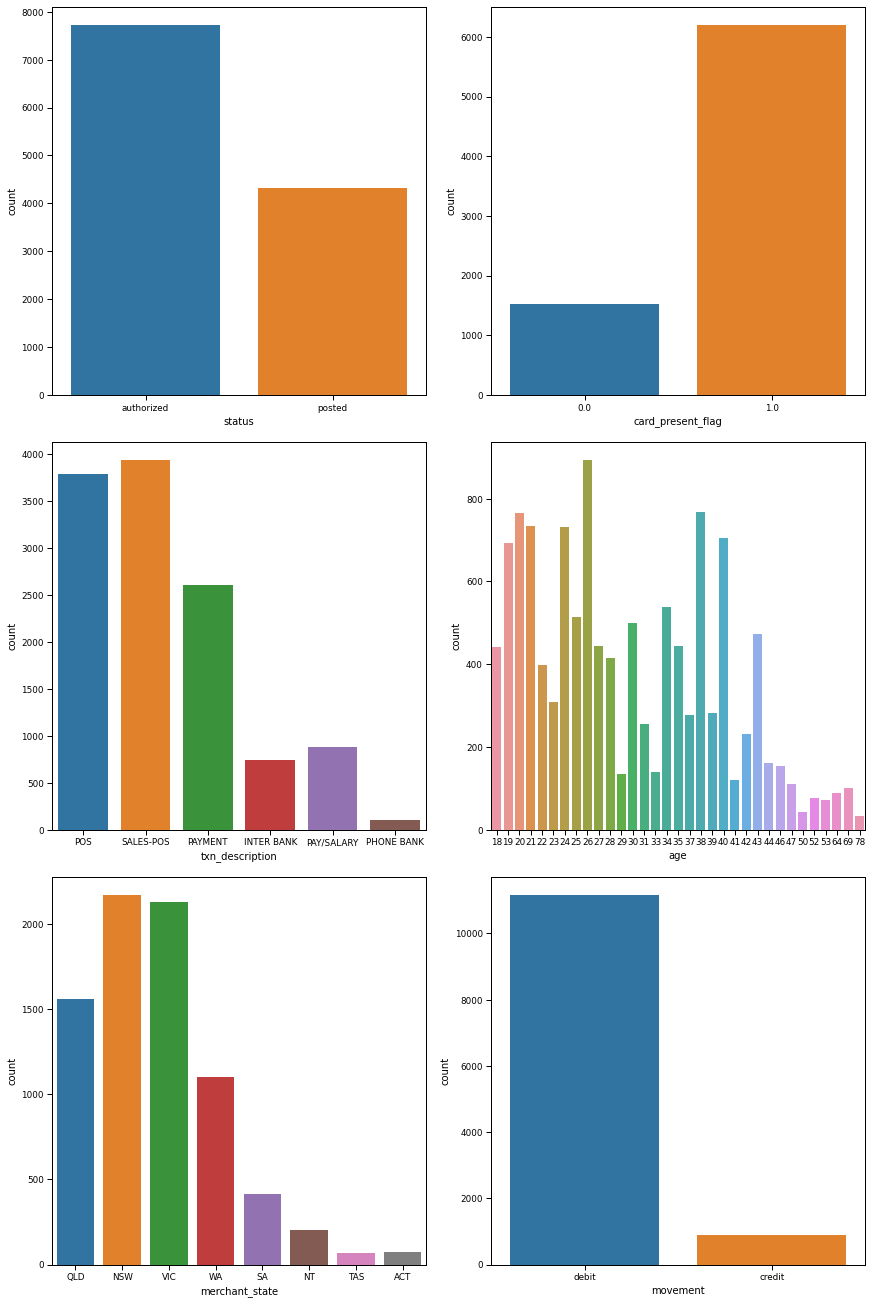

In [8]:
num_plots = len(cat_features)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(6*total_cols, 6*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(cat_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

## Numerical Features

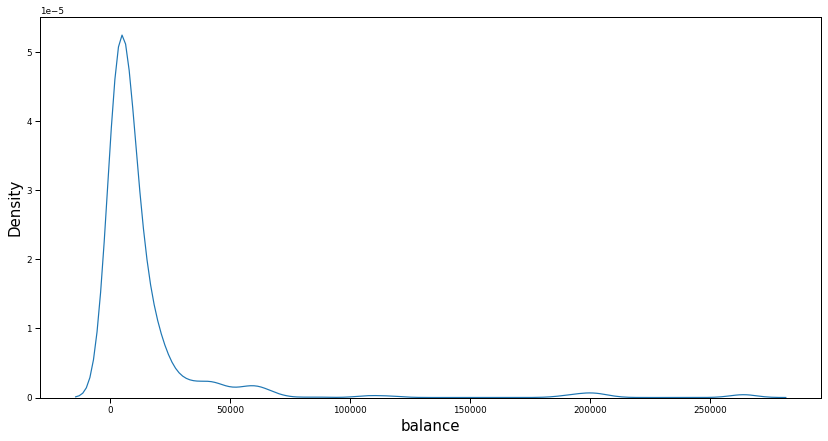

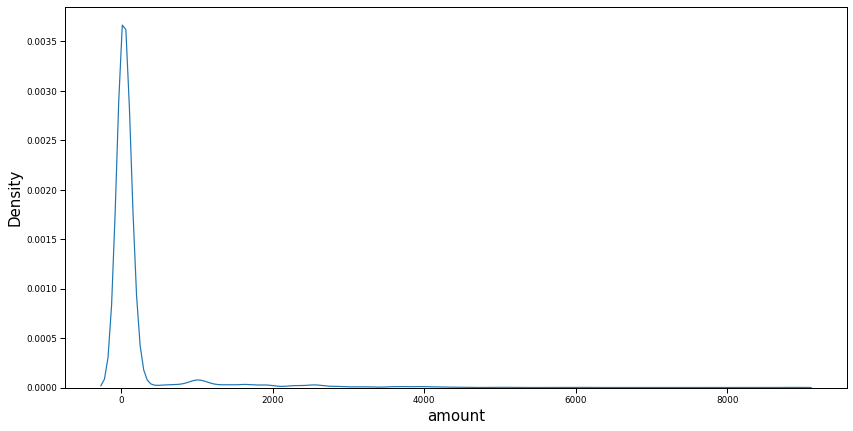

In [9]:
for var in num_features:
    plt.figure(figsize=(7 * 2, 7 * 1), facecolor='w')
    sns.kdeplot(data[var])
    plt.xlabel(var, fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.show()

# Amount Outlier detection

C:\Users\Kushal Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outlier detection of Transaction Amount')

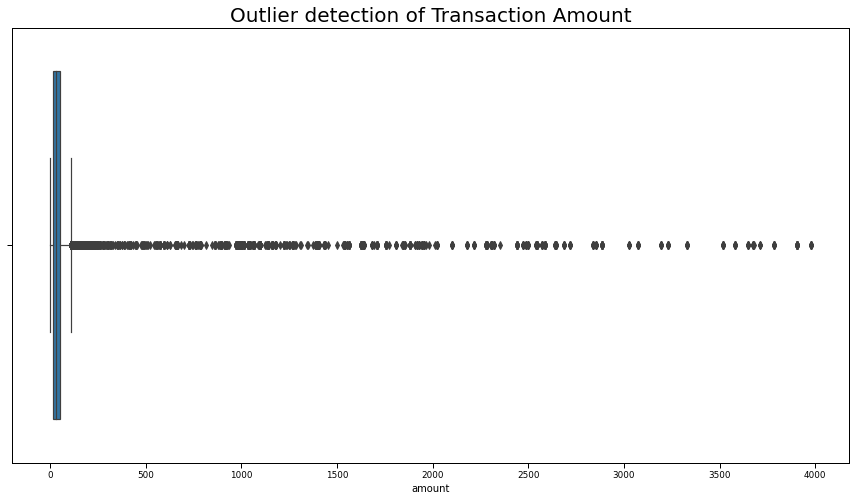

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(data[data['amount'] < 4000]['amount'])
plt.title("Outlier detection of Transaction Amount")

# Balance Outlier detection

C:\Users\Kushal Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outlier detection of Balance after Transaction')

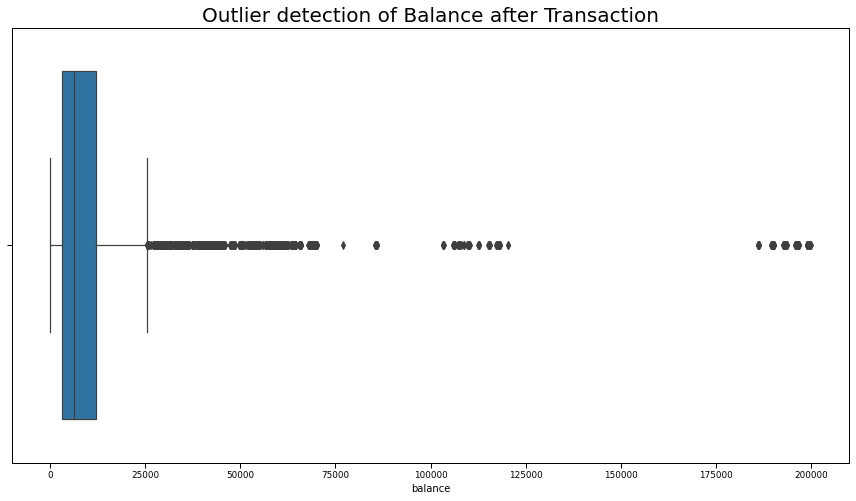

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(data[data['balance'] < 200000]['balance'])
plt.title("Outlier detection of Balance after Transaction")

In [12]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Plotting features again after removing outliers

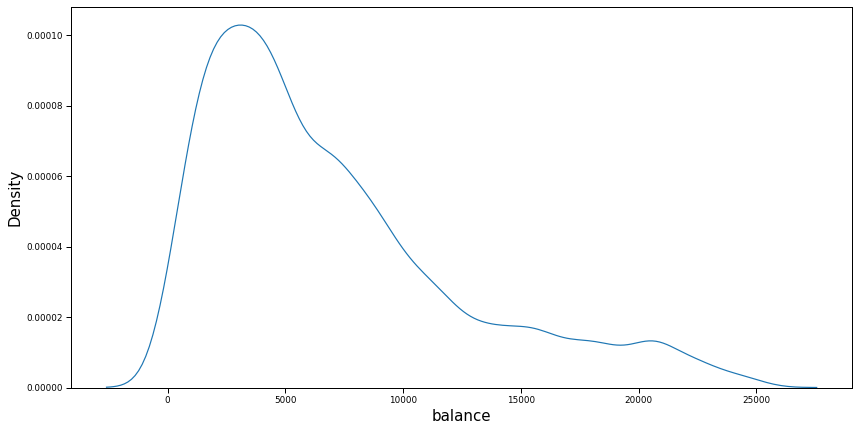

In [13]:
plt.figure(figsize=(14, 7), facecolor='w')
sns.kdeplot(data[data['balance'] < 25000]['balance'])
plt.xlabel("balance", fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

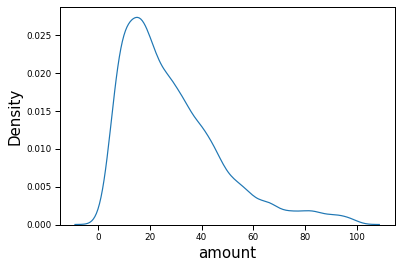

In [14]:
# plt.figure(figsize=(14, 7), facecolor='w')
sns.kdeplot(data[data['amount'] < 100]['amount'])
plt.xlabel("amount", fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

## We observe that both the numerical features - balance and amount are both right skewed


## Total transactions made each day

In [15]:
data['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

# Total transactions made by each customer

In [16]:
data['account'].value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [17]:
data['month'] = data['date'].dt.month


In [18]:
data[data['month']==8]['account'].nunique()

100

# Average number of transactions made by customers each month

10    40.87
9     40.13
8     39.43
Name: month, dtype: float64


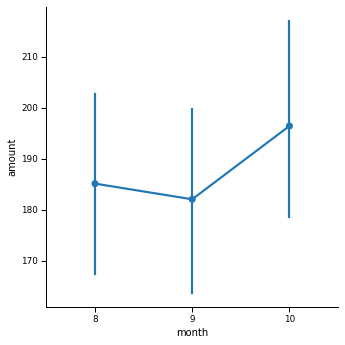

In [19]:
print(data['month'].value_counts() / 100)
sns.catplot(x="month", y="amount", kind="point", data=data);

# Segmenting dataset by date

In [20]:
data_date_count = data.groupby('date').count()
data_date_sum = data.groupby('date').sum()

In [21]:
data_date_count

status  card_present_flag  account  long_lat  txn_description  \
date                                                                        
2018-08-01     137                 84      137       137              137   
2018-08-02     152                 99      152       152              152   
2018-08-03     157                 99      157       157              157   
2018-08-04     118                 94      118       118              118   
2018-08-05     100                 73      100       100              100   
...            ...                ...      ...       ...              ...   
2018-10-27     139                101      139       139              139   
2018-10-28     143                101      143       143              143   
2018-10-29     102                 63      102       102              102   
2018-10-30      89                 50       89        89               89   
2018-10-31     141                 93      141       141              141   

            first_name  balance  gender  age  merchant_suburb  merchant_state  \
date                                                                            
2018-08-01         137      137     137  137               84              84   
2018-08-02         152      152     152  152               99              99   
2018-08-03         157      157     157  157               99              99   
2018-08-04         118      118     118  118               94              94   
2018-08-05         100      100     100  100               73              73   
...                ...      ...     ...  ...              ...             ...   
2018-10-27         139      139     139  139              101             101   
2018-10-28         143      143     143  143              101             101   
2018-10-29         102      102     102  102               63              63   
2018-10-30          89       89      89   89               50              50   
2018-10-31         141      141     141  141               93              93   

            extraction  amount  transaction_id  customer_id  \
date                                                          
2018-08-01         137     137             137          137   
2018-08-02         152     152             152          152   
2018-08-03         157     157             157          157   
2018-08-04         118     118             118          118   
2018-08-05         100     100             100          100   
...                ...     ...             ...          ...   
2018-10-27         139     139             139          139   
2018-10-28         143     143             143          143   
2018-10-29         102     102             102          102   
2018-10-30          89      89              89           89   
2018-10-31         141     141             141          141   

            merchant_long_lat  movement  month  
date                                            
2018-08-01                 84       137    137  
2018-08-02                 99       152    152  
2018-08-03                 99       157    157  
2018-08-04                 94       118    118  
2018-08-05                 73       100    100  
...                       ...       ...    ...  
2018-10-27                101       139    139  
2018-10-28                101       143    143  
2018-10-29                 63       102    102  
2018-10-30                 50        89     89  
2018-10-31                 93       141    141  

[91 rows x 18 columns]

In [22]:
data_date_sum

card_present_flag     balance   age    amount  month
date                                                            
2018-08-01               63.0  1360954.62  4142  29867.94   1096
2018-08-02               85.0  2122469.92  4787  21786.32   1216
2018-08-03               79.0  1599482.51  4985  38096.58   1256
2018-08-04               74.0   968403.51  3662   6296.05    944
2018-08-05               54.0  1329752.54  2991   4426.50    800
...                       ...         ...   ...       ...    ...
2018-10-27               81.0  2366504.71  4336   6971.58   1390
2018-10-28               78.0  2187733.76  4327   8438.11   1430
2018-10-29               47.0  2128124.72  3005  38549.14   1020
2018-10-30               43.0  1691619.62  2790  22062.34    890
2018-10-31               71.0  2367605.45  4323  21967.13   1410

[91 rows x 5 columns]

# Daily Transaction volume distribution

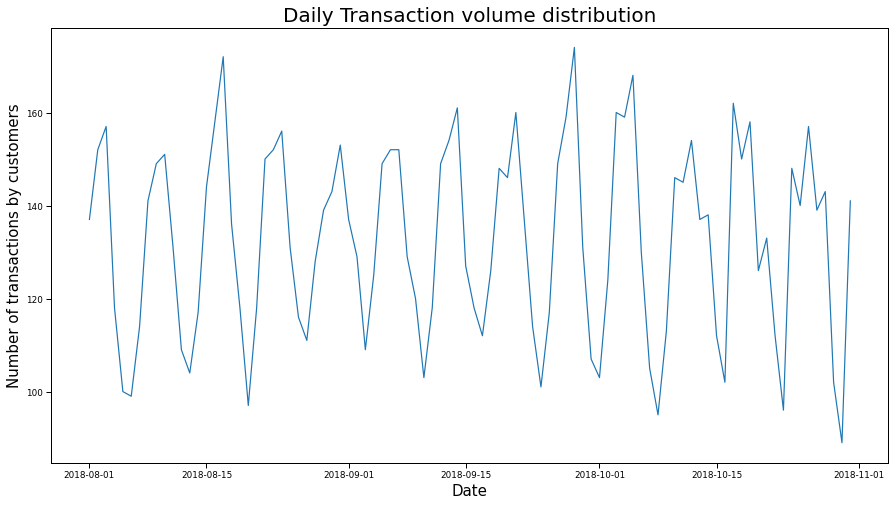

In [23]:
plt.figure(figsize=(15,8))
sns.lineplot(x=data_date_count.index, y=data_date_count['customer_id'])
plt.title("Daily Transaction volume distribution")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of transactions by customers", fontsize=15)
plt.show()

# Daily Transaction Amount distribution

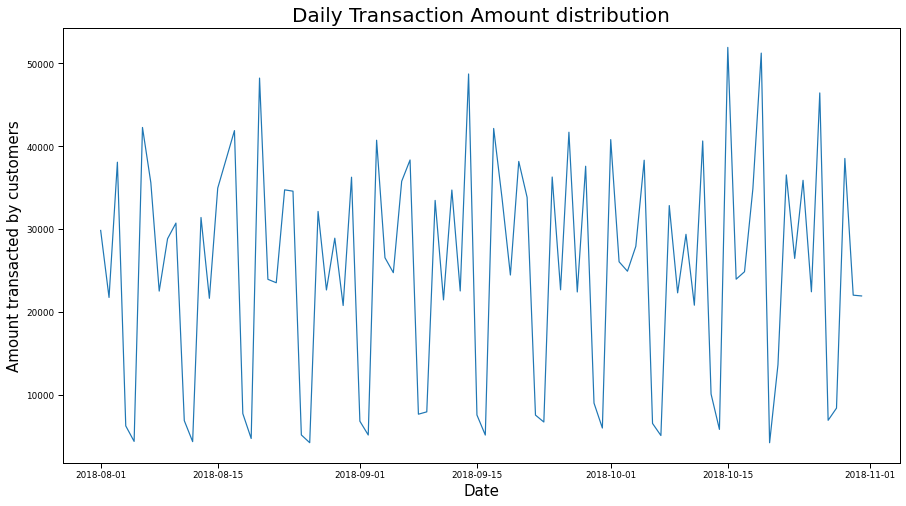

In [24]:

plt.figure(figsize=(15,8))
sns.lineplot(x=data_date_sum.index, y=data_date_sum['amount'])
plt.title("Daily Transaction Amount distribution")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Amount transacted by customers", fontsize=15)
plt.show()

### From the above two line plots, we can infer that the number of transactions as well as the amount transacted are remarkably low on weekends especially on sunday.

# Geospatial Plotting using the location data

In [25]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [26]:
data['long'] = data['long_lat'].apply(lambda x: x.split(' ')[0]).astype(float)
data['lat'] = data['long_lat'].apply(lambda x: x.split(' ')[1]).astype(float)

In [27]:
data['merchant_long'] = data['merchant_long_lat'].dropna(axis=0).apply(lambda x: str(x).split(' ')[0]).astype(float)
data['merchant_lat'] = data['merchant_long_lat'].dropna(axis=0).apply(lambda x: str(x).split(' ')[1]).astype(float)

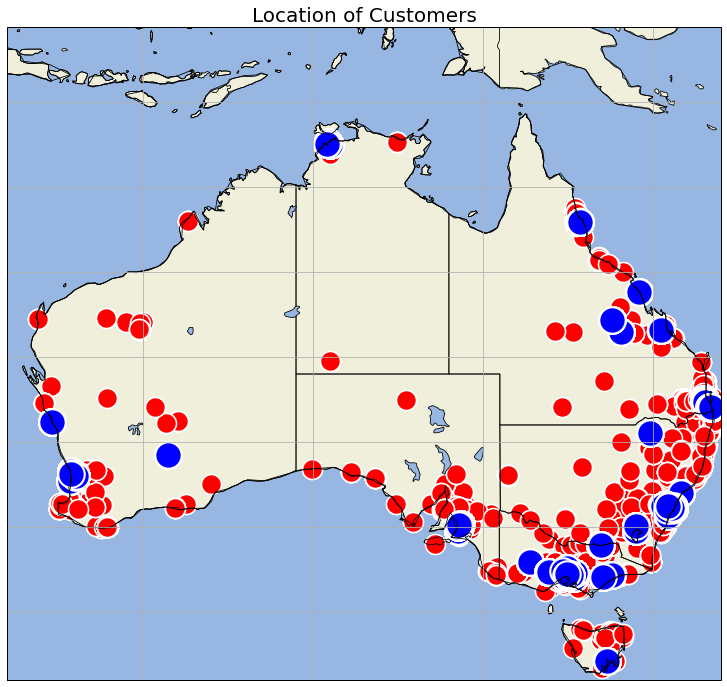

In [28]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Location of Customers')
ax.set_extent([112, 154, -44, -5.6], ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()
ax.add_feature(cfeature.STATES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
sns.scatterplot(
    x=data['merchant_long'],
    y=data['merchant_lat'],
    color="red",
    s=400,
    alpha=1,
    transform=ccrs.PlateCarree()
)
sns.scatterplot(
    x=data['long'],
    y=data['lat'],
    color="blue",
    s=700,
    alpha=1,
    transform=ccrs.PlateCarree()
)
# plt.savefig('map.png')
plt.show()

* As we can see most of the merchants are based in and around Melbourne, Sydney, Brisbane, Perth, Adelaide.